In [113]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [114]:
df = pd.read_table('cmu_dataset/movie.metadata.tsv', names=['Wikipedia_ID', 'Freebase_ID', 'Name', 'Release_Date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

In [115]:
df.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [116]:
def remove_id(s):
    res = ast.literal_eval(s)
    val = list(res.values())[:]
    return str(val)

def remove_language(s, pattern=' language'):
    s = ast.literal_eval(s)
    lang_clean=[]
    for lang in s:
        lang = lang.lower()
        lang_clean.append(str(lang).replace(pattern, ''))
    return str(lang_clean)

def remove_special_character(s):
    s = ast.literal_eval(s)
    tup_s = str(tuple(s))
    s = re.sub("[()']", '', tup_s)
    s = s.rstrip(',')
    s = s.lower()
    return str(s)



"""
test = str(['Thriller'])
print(remove_special_character(test))
print(len(remove_special_character(test)))

test = str(['English Language', 'Norwegian Language'])
print(test)
print(remove_language(test))
"""

"\ntest = str(['Thriller'])\nprint(remove_special_character(test))\nprint(len(remove_special_character(test)))\n\ntest = str(['English Language', 'Norwegian Language'])\nprint(test)\nprint(remove_language(test))\n"

In [117]:
df_copy = df.copy(deep=True)
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_id(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_language(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_special_character(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_id(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_special_character(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_id(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_special_character(x))

In [118]:
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,german,germany,drama


In [119]:
#pd.set_option("display.max_rows", None)
df_copy.value_counts("Languages")

Languages
english                                                                                                                                                                  33748
                                                                                                                                                                         13866
hindi                                                                                                                                                                     3093
spanish                                                                                                                                                                   2633
silent film, english                                                                                                                                                      2297
french                                                                                                             

In [120]:
#df_copy = df_copy[df_copy['Revenue'].notna()]

#print(f"Length before removing Nan in Revenue column {len(df)}")
#print(f"Length after removing Nan in Revenue {len(df_copy)}")

#reduction = (len(df) - len(df_copy))/len(df)

#print(f"Data reduction of {reduction:.2%}")

In [121]:
df_copy.value_counts("Countries")

Countries
united states of america                                                                                                                                  30300
india                                                                                                                                                      8240
                                                                                                                                                           8154
united kingdom                                                                                                                                             5343
japan                                                                                                                                                      2242
france                                                                                                                                                     1853
italy                         

In [122]:
countries_counts = df_copy['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 100
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")

Total number of countries : 147
Number of countries with more than 100 counts : 53


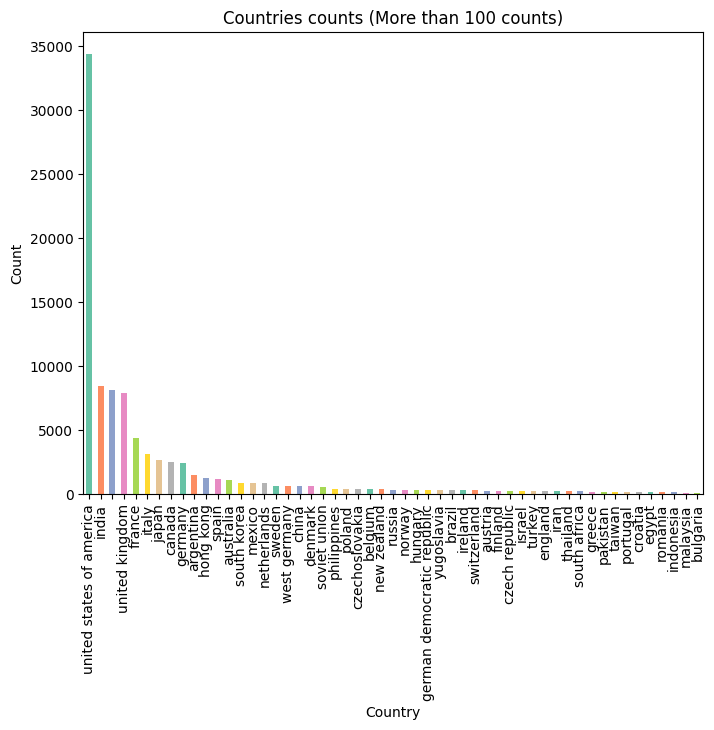

In [123]:
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [124]:
languages_counts = df_copy['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

Total number of languages : 211
Number of countries with more than 40 counts : 61


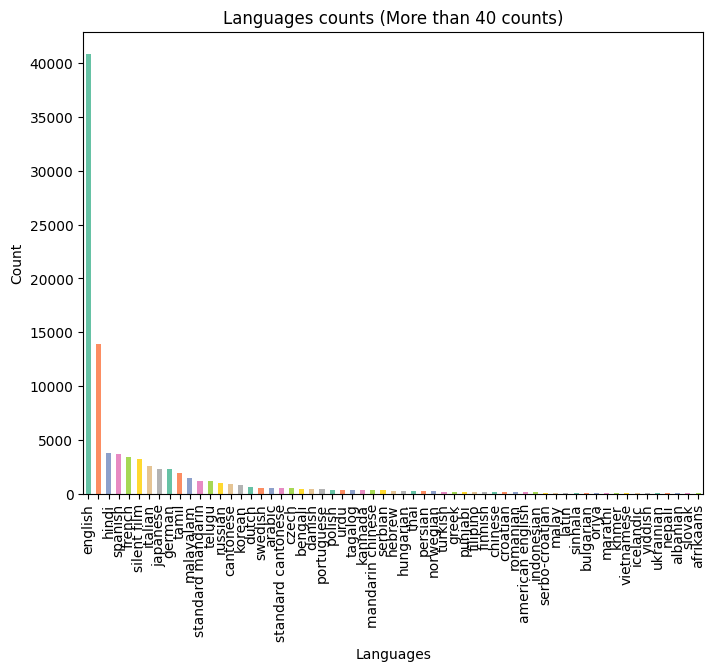

In [125]:
colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

In [126]:
def keep_year(s):
    s = str(s)
    #print(s)
    if s == 'nan': 
        #print('yea')
        return
    #print(type(int(s[:4])))
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True


"""
test = "2005-09-09"

print(keep_year(test))
"""

'\ntest = "2005-09-09"\n\nprint(keep_year(test))\n'

In [127]:
#df_copy = df_copy[df_copy['Release_Date'].notna()]
df_copy.Release_Date = df_copy.Release_Date.apply(lambda x: keep_year(x))
df_copy = df_copy[df_copy['Release_Date'].apply(lambda x: filter_year(x))]
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,german,germany,drama


In [128]:
print(f"Minimum year is {df_copy.Release_Date.min()}")
print(f"Maximum year is {df_copy.Release_Date.max()}")

Minimum year is 1888.0
Maximum year is 2016.0


In [129]:
print(f"Minimum revenue is {df_copy.Revenue.min()}")
print(f"Maximum revenue is {df_copy.Revenue.max()}")

Minimum revenue is 10000.0
Maximum revenue is 2782275172.0


In [130]:
df_copy = df_copy.drop('Wikipedia_ID', axis=1)
df_copy = df_copy.drop('Runtime', axis=1)
#df_copy = df_copy.drop('Genres', axis=1)
df_copy.head()

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,Genres
0,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,english,united states of america,"mystery, biographical film, drama, crime drama"
2,/m/0crgdbh,Brun bitter,1988.0,NaN,norwegian,norway,"crime fiction, drama"
3,/m/0285_cd,White Of The Eye,1987.0,NaN,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983.0,NaN,german,germany,drama


In [131]:
print(len(df_copy))

81740


In [132]:
df_copy.to_csv('../../data/cmu_cleaned.csv', index=False)

In [ ]:
# importing the module 
import ast 

# reading the data from the file 
with open('cmu_dataset/tvtropes.clusters.txt') as f: 
    data = f.read() 

print(f)
print("Data type before reconstruction : ", type(data)) 
      
# reconstructing the data as a dictionary 
#d = ast.literal_eval(data) 
  
#print("Data type after reconstruction : ", type(d)) 
#print(d) 

<_io.TextIOWrapper name='cmu_dataset/tvtropes.clusters.txt' mode='r' encoding='utf-8'>
Data type before reconstruction :  <class 'str'>


In [163]:
df_tropes = pd.read_table('cmu_dataset/tvtropes.clusters.txt', header=None)

big_dict=[]

for i in range(10):
    d = ast.literal_eval(df_tropes.iloc[i][1])
    df_converted = pd.DataFrame(d, index=[df_tropes.iloc[i][0]])
    big_dict.append(df_converted)
#df_tropes.head()

#d2 = ast.literal_eval(df_tropes.iloc[1][1]) 
#print("Data type after reconstruction : ", type(d)) 

#df_converted2 = pd.DataFrame(d2, index=[df_tropes.iloc[1][0]])
#print(df_converted)

#big_dict = [df_converted, df_converted2]
frames = big_dict

result = pd.concat(frames)
print(result)
df_copy.to_csv('../../data/result_tropes.csv', index=False)

                                               char  \
absent_minded_professor   Professor Philip Brainard   
absent_minded_professor          Professor Keenbean   
absent_minded_professor          Dr. Reinhardt Lane   
absent_minded_professor          Dr. Harold Medford   
absent_minded_professor              Daniel Jackson   
adventurer_archaeologist              Indiana Jones   
adventurer_archaeologist              Indiana Jones   
adventurer_archaeologist              Indiana Jones   
adventurer_archaeologist  Evelyn Carnahan-O'Connell   
arrogant_kungfu_guy                             Han   

                                                                      movie  \
absent_minded_professor                                             Flubber   
absent_minded_professor                                         Richie Rich   
absent_minded_professor                                          The Shadow   
absent_minded_professor                                               Them!   

## Add columns for gross, local budget using movie_budjets
github: https://github.com/ntdoris/movie-revenue-analysis/tree/main 
in case interested in other files such as ratings, reviews, and other info

In [52]:
df_cleaned = df_copy.copy(deep=True)

In [53]:
## dataset more cleaned and with additional column production budget
df_movie_budgets = pd.read_csv('movie-revenue-analysis/zippedData/tn.movie_budgets.csv.gz')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [54]:
## less cleaed datset with missing one column, but comprises some other movies
df_movie_gross = pd.read_csv('movie-revenue-analysis/zippedData//bom.movie_gross.csv.gz')
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Manipulating

In [55]:
## DATA CLEANING FOR df_movie_budgets
# Remove dollar signs and commas, and convert columns to numeric
df_movie_budgets['production_budget'] = pd.to_numeric(df_movie_budgets['production_budget'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['domestic_gross'] = pd.to_numeric(df_movie_budgets['domestic_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets['worldwide_gross'] = pd.to_numeric(df_movie_budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True))
df_movie_budgets = df_movie_budgets.rename(columns={'movie': 'Name'})
df_movie_budgets.head()

,id,release_date,Name,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [56]:
# DATA CLEANING FOR df_movie_gross
df_movie_gross = df_movie_gross.rename(columns={'title': 'Name'})
# added the column producion budget with NaN values 
df_movie_gross['production_budget'] = [ np.nan for i in range(len(df_movie_gross))]
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')
df_movie_gross['worldwide_gross'] = df_movie_gross['domestic_gross'] + df_movie_gross['foreign_gross']
df_movie_gross.drop(columns = ['studio', 'year', 'foreign_gross'], inplace= True)
df_movie_gross.head()

,Name,domestic_gross,production_budget,worldwide_gross
0,Toy Story 3,415000000.0,NaN,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,NaN,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,NaN,9.603000e+08
3,Inception,292600000.0,NaN,8.283000e+08
4,Shrek Forever After,238700000.0,NaN,7.526000e+08


In [57]:
# CREATE A DATASET THAT COMBINES THE INFO OF BOTH MOVIE GROSS AND MOVIE BUDGETS
df_movie_gross['Name'] = df_movie_gross['Name'].str.strip().str.lower()
df_movie_budgets['Name'] = df_movie_budgets['Name'].str.strip().str.lower()

# Perform an outer merge on 'Name',  keeping all movies from both DataFrames
df_combined = pd.merge(
    df_movie_gross,
    df_movie_budgets[['Name', 'production_budget', 'domestic_gross', 'worldwide_gross']],
    on='Name',
    how='outer',
    suffixes=('_gross', '_budgets')
)

# Prioritize information from df_movie_budgets when available
df_combined['production_budget'] = df_combined['production_budget_budgets'].combine_first(df_combined['production_budget_gross'])
df_combined['domestic_gross'] = df_combined['domestic_gross_budgets'].combine_first(df_combined['domestic_gross_gross'])
df_combined['worldwide_gross'] = df_combined['worldwide_gross_budgets'].combine_first(df_combined['worldwide_gross_gross'])
df_combined.drop(columns=['production_budget_gross', 'production_budget_budgets', 'domestic_gross_gross', 'domestic_gross_budgets', 'worldwide_gross_gross', 'worldwide_gross_budgets'], inplace=True)
df_combined.head()


,Name,production_budget,domestic_gross,worldwide_gross
0,#horror,1500000.0,0.0,0.0
1,'71,NaN,1300000.0,1655000.0
2,(500) days of summer,7500000.0,32425665.0,34439060.0
3,"1,000 times good night",NaN,53900.0,NaN
4,10 cloverfield lane,5000000.0,72082999.0,108286422.0


In [58]:
# MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT
df_cleaned['Name'] = df_cleaned['Name'].str.strip().str.lower()

# Merge combined data with domestic_gross and production budget info with the cleaned original data
df_cleaned_with_budget = pd.merge(
    df_cleaned,
    df_combined[['Name', 'production_budget', 'domestic_gross', 'worldwide_gross']],
    left_on='Name',
    right_on='Name',
    how='left'
)

print(f"Number of movies with budget information added: {df_cleaned_with_budget['production_budget'].notna().sum()}")
df_cleaned_with_budget.head()

Number of movies with budget information added: 3345


,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,production_budget,domestic_gross,worldwide_gross
0,/m/03vyhn,ghosts of mars,2001,14010832.0,english,united states of america,NaN,NaN,NaN
1,/m/02qc0j7,alexander's ragtime band,1938,3600000.0,english,united states of america,2000000.0,4000000.0,4000000.0
2,/m/016ywb,henry v,1989,10161099.0,english,united kingdom,9000000.0,10161099.0,10176701.0
3,/m/0kcn7,mary poppins,1964,102272727.0,english,united states of america,6000000.0,102272145.0,102272145.0
4,/m/02wjqm,new rose hotel,1999,21521.0,english,united states of america,NaN,NaN,NaN


In [59]:
print(f"Number of rows before cleaning: {len(df_cleaned_with_budget)}")
df_cleaned_with_budget_drop = df_cleaned_with_budget.dropna()
print(f"Number of rows after cleaning: {len(df_cleaned_with_budget_drop)}")


Number of rows before cleaning: 8438
Number of rows after cleaning: 3345


In [60]:
df_cleaned_with_budget_drop.head()
## NOTA: THE WORLD_WIDE GROSS AND THE REVENUE SHOULD BE THE SAME BUT THEY ARE NOT ALWAYS THE SAME ?!?!?

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,production_budget,domestic_gross,worldwide_gross
1,/m/02qc0j7,alexander's ragtime band,1938,3600000.0,english,united states of america,2000000.0,4000000.0,4000000.0
2,/m/016ywb,henry v,1989,10161099.0,english,united kingdom,9000000.0,10161099.0,10176701.0
3,/m/0kcn7,mary poppins,1964,102272727.0,english,united states of america,6000000.0,102272145.0,102272145.0
5,/m/014k4y,baby boy,2001,29381649.0,english,united states of america,16000000.0,28734552.0,28734552.0
21,/m/09kzfd,things to do in denver when you're dead,1995,529677.0,english,united states of america,15000000.0,529766.0,529766.0
